# CycleGAN train

In [1]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

Using TensorFlow backend.


In [2]:

# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

# data

In [3]:
IMAGE_SIZE = 128

In [4]:

data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


# architecture

In [5]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    


W0318 18:41:09.178812 16184 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\py36-cycleGAN\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0318 18:41:09.218704 16184 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\py36-cycleGAN\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0318 18:41:09.226685 16184 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\py36-cycleGAN\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0318 18:41:09.514913 16184 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\py36-cycleGAN\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0318 

In [6]:
gan.g_BA.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 64, 64, 32)   1568        input_4[0][0]                    
__________________________________________________________________________________________________
instance_normalization_14 (Inst (None, 64, 64, 32)   0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 64, 64, 32)   0           instance_normalization_14[0][0]  
__________________________________________________________________________________________________
conv2d_20 

In [7]:
gan.g_AB.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 64, 64, 32)   1568        input_3[0][0]                    
__________________________________________________________________________________________________
instance_normalization_7 (Insta (None, 64, 64, 32)   0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 32)   0           instance_normalization_7[0][0]   
__________________________________________________________________________________________________
conv2d_12 

In [8]:
gan.d_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_1 (In (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       131200    
__________

In [9]:
gan.d_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_4 (In (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       131200    
__________

# train

In [10]:
epoch1 = 1
epoch200 = 200
BATCH_SIZE = 1
EPOCHS = epoch1
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

In [11]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

W0318 18:41:15.001034 16184 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\py36-cycleGAN\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

C:\ProgramData\Anaconda3\envs\py36-cycleGAN\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/1] [Batch 0/995] [D loss: 1.221879, acc:  32%] [G loss: 18.838579, adv: 1.932456, recon: 1.403695, id: 1.434589] time: 0:00:30.458773 
[Epoch 0/1] [Batch 1/995] [D loss: 1.152009, acc:  37%] [G loss: 16.960018, adv: 1.768973, recon: 1.265208, id: 1.269484] time: 0:00:45.371132 
[Epoch 0/1] [Batch 2/995] [D loss: 0.834417, acc:  40%] [G loss: 15.871772, adv: 1.879390, recon: 1.146425, id: 1.264065] time: 0:00:48.210935 
[Epoch 0/1] [Batch 3/995] [D loss: 0.921929, acc:  38%] [G loss: 19.350407, adv: 1.560949, recon: 1.460727, id: 1.591095] time: 0:00:50.976102 
[Epoch 0/1] [Batch 4/995] [D loss: 0.637321, acc:  47%] [G loss: 14.682552, adv: 1.324052, recon: 1.091674, id: 1.220879] time: 0:00:53.965737 
[Epoch 0/1] [Batch 5/995] [D loss: 0.619849, acc:  49%] [G loss: 14.081771, adv: 1.974982, recon: 0.959194, id: 1.257425] time: 0:00:56.751964 
[Epoch 0/1] [Batch 6/995] [D loss: 0.805444, acc:  39%] [G loss: 16.393984, adv: 1.943717, recon: 1.169806, id: 1.376105] time: 0:00:59.

[Epoch 0/1] [Batch 57/995] [D loss: 0.315175, acc:  54%] [G loss: 9.581179, adv: 0.772866, recon: 0.733809, id: 0.735110] time: 0:03:59.735561 
[Epoch 0/1] [Batch 58/995] [D loss: 0.337580, acc:  58%] [G loss: 10.479227, adv: 1.213417, recon: 0.773302, id: 0.766393] time: 0:04:02.385476 
[Epoch 0/1] [Batch 59/995] [D loss: 0.210485, acc:  67%] [G loss: 8.601715, adv: 1.112127, recon: 0.621077, id: 0.639407] time: 0:04:05.035390 
[Epoch 0/1] [Batch 60/995] [D loss: 0.325584, acc:  55%] [G loss: 9.217384, adv: 0.767531, recon: 0.708168, id: 0.684089] time: 0:04:07.686302 
[Epoch 0/1] [Batch 61/995] [D loss: 0.448335, acc:  36%] [G loss: 8.461840, adv: 0.587626, recon: 0.663240, id: 0.620905] time: 0:04:12.801459 
[Epoch 0/1] [Batch 62/995] [D loss: 0.265242, acc:  66%] [G loss: 9.293766, adv: 0.726671, recon: 0.710231, id: 0.732391] time: 0:04:15.407490 
[Epoch 0/1] [Batch 63/995] [D loss: 0.304374, acc:  54%] [G loss: 13.422626, adv: 0.608880, recon: 1.072580, id: 1.043973] time: 0:04:1

[Epoch 0/1] [Batch 114/995] [D loss: 0.254569, acc:  60%] [G loss: 7.596058, adv: 1.014070, recon: 0.548992, id: 0.546036] time: 0:06:45.672658 
[Epoch 0/1] [Batch 115/995] [D loss: 0.194507, acc:  71%] [G loss: 9.541668, adv: 0.993533, recon: 0.712827, id: 0.709934] time: 0:06:48.183899 
[Epoch 0/1] [Batch 116/995] [D loss: 0.319039, acc:  52%] [G loss: 8.818583, adv: 0.958561, recon: 0.665052, id: 0.604749] time: 0:06:50.919583 
[Epoch 0/1] [Batch 117/995] [D loss: 0.332594, acc:  47%] [G loss: 9.541786, adv: 0.835225, recon: 0.733027, id: 0.688147] time: 0:06:53.663247 
[Epoch 0/1] [Batch 118/995] [D loss: 0.260895, acc:  60%] [G loss: 7.234471, adv: 0.665599, recon: 0.552517, id: 0.521852] time: 0:06:56.248335 
[Epoch 0/1] [Batch 119/995] [D loss: 0.305751, acc:  50%] [G loss: 7.979221, adv: 0.569470, recon: 0.616151, id: 0.624121] time: 0:06:58.807492 
[Epoch 0/1] [Batch 120/995] [D loss: 0.285680, acc:  53%] [G loss: 10.555113, adv: 0.614080, recon: 0.839990, id: 0.770568] time: 

[Epoch 0/1] [Batch 171/995] [D loss: 0.373123, acc:  49%] [G loss: 6.863209, adv: 0.343530, recon: 0.555455, id: 0.482563] time: 0:09:31.980944 
[Epoch 0/1] [Batch 172/995] [D loss: 0.286330, acc:  57%] [G loss: 7.751736, adv: 0.444901, recon: 0.624906, id: 0.528887] time: 0:09:34.407454 
[Epoch 0/1] [Batch 173/995] [D loss: 0.239709, acc:  63%] [G loss: 10.138845, adv: 1.115934, recon: 0.768720, id: 0.667857] time: 0:09:36.877849 
[Epoch 0/1] [Batch 174/995] [D loss: 0.224501, acc:  62%] [G loss: 7.229371, adv: 1.055652, recon: 0.522034, id: 0.476690] time: 0:09:39.287402 
[Epoch 0/1] [Batch 175/995] [D loss: 0.178101, acc:  74%] [G loss: 6.081133, adv: 0.986941, recon: 0.436450, id: 0.364846] time: 0:09:41.917369 
[Epoch 0/1] [Batch 176/995] [D loss: 0.484774, acc:  40%] [G loss: 7.324744, adv: 0.788368, recon: 0.548053, id: 0.527925] time: 0:09:44.617149 
[Epoch 0/1] [Batch 177/995] [D loss: 0.308004, acc:  57%] [G loss: 7.643398, adv: 0.820638, recon: 0.574885, id: 0.536957] time: 

[Epoch 0/1] [Batch 228/995] [D loss: 0.243303, acc:  59%] [G loss: 7.480922, adv: 0.926360, recon: 0.553329, id: 0.510636] time: 0:12:12.163881 
[Epoch 0/1] [Batch 229/995] [D loss: 0.298461, acc:  53%] [G loss: 7.992336, adv: 0.719182, recon: 0.609277, id: 0.590194] time: 0:12:14.774900 
[Epoch 0/1] [Batch 230/995] [D loss: 0.177840, acc:  75%] [G loss: 6.846509, adv: 0.964340, recon: 0.483315, id: 0.524508] time: 0:12:17.607325 
[Epoch 0/1] [Batch 231/995] [D loss: 0.344981, acc:  41%] [G loss: 8.313465, adv: 0.767566, recon: 0.648814, id: 0.528881] time: 0:12:23.318654 
[Epoch 0/1] [Batch 232/995] [D loss: 0.222218, acc:  60%] [G loss: 7.499546, adv: 0.920707, recon: 0.558038, id: 0.499228] time: 0:12:25.980537 
[Epoch 0/1] [Batch 233/995] [D loss: 0.166154, acc:  74%] [G loss: 6.441973, adv: 0.829917, recon: 0.472005, id: 0.446004] time: 0:12:28.703257 
[Epoch 0/1] [Batch 234/995] [D loss: 0.215996, acc:  67%] [G loss: 6.628965, adv: 0.800317, recon: 0.492766, id: 0.450493] time: 0

[Epoch 0/1] [Batch 285/995] [D loss: 0.239168, acc:  59%] [G loss: 6.377967, adv: 0.757710, recon: 0.471178, id: 0.454240] time: 0:14:56.754498 
[Epoch 0/1] [Batch 286/995] [D loss: 0.392247, acc:  41%] [G loss: 8.031385, adv: 0.489947, recon: 0.629573, id: 0.622856] time: 0:14:59.377486 
[Epoch 0/1] [Batch 287/995] [D loss: 0.244253, acc:  58%] [G loss: 6.992586, adv: 0.636305, recon: 0.521619, id: 0.570047] time: 0:15:02.038372 
[Epoch 0/1] [Batch 288/995] [D loss: 0.259594, acc:  59%] [G loss: 4.751998, adv: 0.481148, recon: 0.361530, id: 0.327775] time: 0:15:04.612951 
[Epoch 0/1] [Batch 289/995] [D loss: 0.295857, acc:  50%] [G loss: 7.434042, adv: 0.631862, recon: 0.569089, id: 0.555647] time: 0:15:07.216988 
[Epoch 0/1] [Batch 290/995] [D loss: 0.224634, acc:  61%] [G loss: 9.702418, adv: 1.236801, recon: 0.716953, id: 0.648043] time: 0:15:09.855931 
[Epoch 0/1] [Batch 291/995] [D loss: 0.201168, acc:  70%] [G loss: 7.334354, adv: 0.725976, recon: 0.551640, id: 0.545987] time: 0

[Epoch 0/1] [Batch 342/995] [D loss: 0.238871, acc:  62%] [G loss: 6.721304, adv: 0.817365, recon: 0.487681, id: 0.513564] time: 0:17:48.111290 
[Epoch 0/1] [Batch 343/995] [D loss: 0.247319, acc:  56%] [G loss: 7.218054, adv: 0.945660, recon: 0.531996, id: 0.476218] time: 0:17:50.616590 
[Epoch 0/1] [Batch 344/995] [D loss: 0.280601, acc:  59%] [G loss: 6.984036, adv: 0.701728, recon: 0.521945, id: 0.531428] time: 0:17:53.114911 
[Epoch 0/1] [Batch 345/995] [D loss: 0.209054, acc:  72%] [G loss: 6.669801, adv: 1.418823, recon: 0.435327, id: 0.448851] time: 0:17:55.471086 
[Epoch 0/1] [Batch 346/995] [D loss: 0.356222, acc:  39%] [G loss: 8.429448, adv: 0.582615, recon: 0.666136, id: 0.592737] time: 0:17:57.954445 
[Epoch 0/1] [Batch 347/995] [D loss: 0.221728, acc:  64%] [G loss: 6.791526, adv: 1.105125, recon: 0.477858, id: 0.453908] time: 0:18:00.378963 
[Epoch 0/1] [Batch 348/995] [D loss: 0.315065, acc:  55%] [G loss: 4.476798, adv: 0.382638, recon: 0.344316, id: 0.325498] time: 0

[Epoch 0/1] [Batch 399/995] [D loss: 0.405721, acc:  38%] [G loss: 5.779842, adv: 1.174482, recon: 0.394750, id: 0.328929] time: 0:20:28.338293 
[Epoch 0/1] [Batch 400/995] [D loss: 0.383711, acc:  41%] [G loss: 6.513387, adv: 0.883576, recon: 0.483060, id: 0.399608] time: 0:20:30.784750 
[Epoch 0/1] [Batch 401/995] [D loss: 0.294027, acc:  50%] [G loss: 6.199580, adv: 0.752123, recon: 0.457699, id: 0.435234] time: 0:20:35.668978 
[Epoch 0/1] [Batch 402/995] [D loss: 0.350975, acc:  32%] [G loss: 7.451190, adv: 0.577335, recon: 0.588289, id: 0.495483] time: 0:20:38.232124 
[Epoch 0/1] [Batch 403/995] [D loss: 0.353994, acc:  46%] [G loss: 6.041236, adv: 0.732633, recon: 0.455341, id: 0.377598] time: 0:20:40.865338 
[Epoch 0/1] [Batch 404/995] [D loss: 0.325178, acc:  38%] [G loss: 6.021881, adv: 0.625157, recon: 0.462412, id: 0.386302] time: 0:20:43.534203 
[Epoch 0/1] [Batch 405/995] [D loss: 0.261994, acc:  56%] [G loss: 8.945983, adv: 0.563589, recon: 0.704796, id: 0.667218] time: 0

[Epoch 0/1] [Batch 456/995] [D loss: 0.129770, acc:  83%] [G loss: 8.514090, adv: 0.891744, recon: 0.630356, id: 0.659392] time: 0:23:12.810821 
[Epoch 0/1] [Batch 457/995] [D loss: 0.181503, acc:  73%] [G loss: 6.415248, adv: 0.278744, recon: 0.513255, id: 0.501980] time: 0:23:15.443781 
[Epoch 0/1] [Batch 458/995] [D loss: 0.224753, acc:  61%] [G loss: 7.259467, adv: 0.695076, recon: 0.549730, id: 0.533546] time: 0:23:18.273114 
[Epoch 0/1] [Batch 459/995] [D loss: 0.240286, acc:  55%] [G loss: 7.203225, adv: 0.705557, recon: 0.539497, id: 0.551349] time: 0:23:21.008800 
[Epoch 0/1] [Batch 460/995] [D loss: 0.153223, acc:  79%] [G loss: 8.452629, adv: 1.044498, recon: 0.621241, id: 0.597858] time: 0:23:23.639764 
[Epoch 0/1] [Batch 461/995] [D loss: 0.426692, acc:  31%] [G loss: 5.354761, adv: 0.852664, recon: 0.373937, id: 0.381365] time: 0:23:28.823906 
[Epoch 0/1] [Batch 462/995] [D loss: 0.215775, acc:  63%] [G loss: 7.399599, adv: 0.974592, recon: 0.534352, id: 0.540743] time: 0

[Epoch 0/1] [Batch 513/995] [D loss: 0.344626, acc:  43%] [G loss: 5.959088, adv: 0.790781, recon: 0.433655, id: 0.415879] time: 0:25:55.514011 
[Epoch 0/1] [Batch 514/995] [D loss: 0.158296, acc:  79%] [G loss: 6.223290, adv: 1.041740, recon: 0.426789, id: 0.456831] time: 0:25:57.893648 
[Epoch 0/1] [Batch 515/995] [D loss: 0.187477, acc:  72%] [G loss: 8.445330, adv: 1.066200, recon: 0.614118, id: 0.618973] time: 0:26:00.252341 
[Epoch 0/1] [Batch 516/995] [D loss: 0.403058, acc:  40%] [G loss: 6.655619, adv: 0.800591, recon: 0.498456, id: 0.435236] time: 0:26:02.749665 
[Epoch 0/1] [Batch 517/995] [D loss: 0.270106, acc:  49%] [G loss: 6.344409, adv: 0.985841, recon: 0.448305, id: 0.437761] time: 0:26:05.211083 
[Epoch 0/1] [Batch 518/995] [D loss: 0.324708, acc:  50%] [G loss: 6.183983, adv: 0.614779, recon: 0.469525, id: 0.436976] time: 0:26:07.688931 
[Epoch 0/1] [Batch 519/995] [D loss: 0.314011, acc:  45%] [G loss: 5.732375, adv: 0.574386, recon: 0.438158, id: 0.388206] time: 0

[Epoch 0/1] [Batch 570/995] [D loss: 0.390882, acc:  30%] [G loss: 5.642492, adv: 0.561647, recon: 0.428779, id: 0.396529] time: 0:28:36.645869 
[Epoch 0/1] [Batch 571/995] [D loss: 0.239478, acc:  62%] [G loss: 6.041855, adv: 1.184035, recon: 0.409276, id: 0.382530] time: 0:28:41.794113 
[Epoch 0/1] [Batch 572/995] [D loss: 0.252079, acc:  61%] [G loss: 7.733942, adv: 1.249113, recon: 0.545785, id: 0.513487] time: 0:28:44.381194 
[Epoch 0/1] [Batch 573/995] [D loss: 0.268818, acc:  48%] [G loss: 8.462239, adv: 0.975605, recon: 0.629233, id: 0.597150] time: 0:28:47.087957 
[Epoch 0/1] [Batch 574/995] [D loss: 0.310578, acc:  42%] [G loss: 7.392565, adv: 0.962727, recon: 0.537075, id: 0.529543] time: 0:28:49.851567 
[Epoch 0/1] [Batch 575/995] [D loss: 0.159083, acc:  80%] [G loss: 6.334919, adv: 0.543546, recon: 0.478030, id: 0.505537] time: 0:28:52.657065 
[Epoch 0/1] [Batch 576/995] [D loss: 0.439824, acc:  25%] [G loss: 7.186091, adv: 1.207663, recon: 0.506077, id: 0.458831] time: 0

[Epoch 0/1] [Batch 627/995] [D loss: 0.136798, acc:  81%] [G loss: 6.436955, adv: 1.320724, recon: 0.435783, id: 0.379202] time: 0:31:19.938397 
[Epoch 0/1] [Batch 628/995] [D loss: 0.202115, acc:  64%] [G loss: 6.671998, adv: 0.456499, recon: 0.531067, id: 0.452412] time: 0:31:22.294097 
[Epoch 0/1] [Batch 629/995] [D loss: 0.257609, acc:  53%] [G loss: 5.703619, adv: 0.462933, recon: 0.440807, id: 0.416309] time: 0:31:24.687698 
[Epoch 0/1] [Batch 630/995] [D loss: 0.366443, acc:  58%] [G loss: 5.985251, adv: 1.485089, recon: 0.377169, id: 0.364236] time: 0:31:27.171057 
[Epoch 0/1] [Batch 631/995] [D loss: 0.246240, acc:  63%] [G loss: 7.399096, adv: 1.318623, recon: 0.512321, id: 0.478629] time: 0:31:32.123429 
[Epoch 0/1] [Batch 632/995] [D loss: 0.348721, acc:  37%] [G loss: 6.047251, adv: 1.033406, recon: 0.416723, id: 0.423308] time: 0:31:34.563903 
[Epoch 0/1] [Batch 633/995] [D loss: 0.172141, acc:  72%] [G loss: 7.411983, adv: 0.703956, recon: 0.565430, id: 0.526865] time: 0

[Epoch 0/1] [Batch 684/995] [D loss: 0.176663, acc:  75%] [G loss: 5.858751, adv: 0.751663, recon: 0.425304, id: 0.427023] time: 0:34:02.837432 
[Epoch 0/1] [Batch 685/995] [D loss: 0.145937, acc:  84%] [G loss: 6.431189, adv: 0.741027, recon: 0.489174, id: 0.399209] time: 0:34:05.337745 
[Epoch 0/1] [Batch 686/995] [D loss: 0.231303, acc:  63%] [G loss: 6.077931, adv: 1.205353, recon: 0.394196, id: 0.465310] time: 0:34:07.983670 
[Epoch 0/1] [Batch 687/995] [D loss: 0.185256, acc:  72%] [G loss: 7.921622, adv: 1.442967, recon: 0.548931, id: 0.494673] time: 0:34:10.545820 
[Epoch 0/1] [Batch 688/995] [D loss: 0.300840, acc:  53%] [G loss: 6.556415, adv: 0.771816, recon: 0.490470, id: 0.439951] time: 0:34:13.116944 
[Epoch 0/1] [Batch 689/995] [D loss: 0.187799, acc:  70%] [G loss: 5.381881, adv: 0.773150, recon: 0.379118, id: 0.408776] time: 0:34:15.678097 
[Epoch 0/1] [Batch 690/995] [D loss: 0.201060, acc:  66%] [G loss: 6.707235, adv: 0.779019, recon: 0.495563, id: 0.486294] time: 0

[Epoch 0/1] [Batch 741/995] [D loss: 0.264877, acc:  58%] [G loss: 6.605577, adv: 0.728218, recon: 0.492279, id: 0.477286] time: 0:36:34.180730 
[Epoch 0/1] [Batch 742/995] [D loss: 0.235601, acc:  59%] [G loss: 4.815228, adv: 0.889477, recon: 0.334773, id: 0.289008] time: 0:36:36.668077 
[Epoch 0/1] [Batch 743/995] [D loss: 0.133458, acc:  86%] [G loss: 9.290677, adv: 1.271395, recon: 0.674731, id: 0.635985] time: 0:36:39.196317 
[Epoch 0/1] [Batch 744/995] [D loss: 0.171691, acc:  75%] [G loss: 5.745202, adv: 1.158320, recon: 0.384586, id: 0.370512] time: 0:36:41.904077 
[Epoch 0/1] [Batch 745/995] [D loss: 0.141794, acc:  81%] [G loss: 7.795774, adv: 1.102660, recon: 0.557113, id: 0.560994] time: 0:36:44.561970 
[Epoch 0/1] [Batch 746/995] [D loss: 0.363108, acc:  50%] [G loss: 6.084341, adv: 0.891858, recon: 0.435984, id: 0.416322] time: 0:36:47.243800 
[Epoch 0/1] [Batch 747/995] [D loss: 0.137320, acc:  83%] [G loss: 6.868528, adv: 1.618241, recon: 0.447303, id: 0.388631] time: 0

[Epoch 0/1] [Batch 798/995] [D loss: 0.299459, acc:  62%] [G loss: 6.420116, adv: 0.925403, recon: 0.467357, id: 0.410574] time: 0:39:12.459540 
[Epoch 0/1] [Batch 799/995] [D loss: 0.287128, acc:  53%] [G loss: 7.303150, adv: 1.090019, recon: 0.521400, id: 0.499566] time: 0:39:15.030664 
[Epoch 0/1] [Batch 800/995] [D loss: 0.202580, acc:  63%] [G loss: 5.230413, adv: 0.734401, recon: 0.380690, id: 0.344557] time: 0:39:17.586829 
[Epoch 0/1] [Batch 801/995] [D loss: 0.243707, acc:  58%] [G loss: 8.658587, adv: 0.792520, recon: 0.660089, id: 0.632589] time: 0:39:22.769686 
[Epoch 0/1] [Batch 802/995] [D loss: 0.360731, acc:  37%] [G loss: 6.626894, adv: 0.780620, recon: 0.499693, id: 0.424674] time: 0:39:25.249057 
[Epoch 0/1] [Batch 803/995] [D loss: 0.289041, acc:  49%] [G loss: 5.761849, adv: 0.804302, recon: 0.423603, id: 0.360758] time: 0:39:27.815194 
[Epoch 0/1] [Batch 804/995] [D loss: 0.138519, acc:  82%] [G loss: 8.327938, adv: 1.158266, recon: 0.608577, id: 0.541951] time: 0

[Epoch 0/1] [Batch 855/995] [D loss: 0.168012, acc:  73%] [G loss: 6.322073, adv: 0.590301, recon: 0.486622, id: 0.432779] time: 0:41:45.299811 
[Epoch 0/1] [Batch 856/995] [D loss: 0.264226, acc:  59%] [G loss: 8.138897, adv: 0.829430, recon: 0.607721, id: 0.616128] time: 0:41:47.601057 
[Epoch 0/1] [Batch 857/995] [D loss: 0.160621, acc:  77%] [G loss: 6.495541, adv: 1.196324, recon: 0.439711, id: 0.451051] time: 0:41:49.867264 
[Epoch 0/1] [Batch 858/995] [D loss: 0.250881, acc:  60%] [G loss: 6.915517, adv: 0.486194, recon: 0.537524, id: 0.527043] time: 0:41:52.178086 
[Epoch 0/1] [Batch 859/995] [D loss: 0.248903, acc:  58%] [G loss: 8.467366, adv: 0.729734, recon: 0.636981, id: 0.683909] time: 0:41:54.634518 
[Epoch 0/1] [Batch 860/995] [D loss: 0.259011, acc:  56%] [G loss: 5.610701, adv: 1.017542, recon: 0.387947, id: 0.356844] time: 0:41:57.052958 
[Epoch 0/1] [Batch 861/995] [D loss: 0.310907, acc:  41%] [G loss: 4.547538, adv: 0.469170, recon: 0.334167, id: 0.368350] time: 0

[Epoch 0/1] [Batch 912/995] [D loss: 0.213459, acc:  59%] [G loss: 5.617535, adv: 1.196112, recon: 0.370597, id: 0.357724] time: 0:44:24.303271 
[Epoch 0/1] [Batch 913/995] [D loss: 0.244309, acc:  59%] [G loss: 4.130421, adv: 0.466966, recon: 0.314266, id: 0.260398] time: 0:44:26.891352 
[Epoch 0/1] [Batch 914/995] [D loss: 0.136943, acc:  81%] [G loss: 5.407603, adv: 0.973149, recon: 0.382493, id: 0.304761] time: 0:44:29.503366 
[Epoch 0/1] [Batch 915/995] [D loss: 0.230784, acc:  64%] [G loss: 6.662545, adv: 0.405573, recon: 0.506708, id: 0.594948] time: 0:44:32.204145 
[Epoch 0/1] [Batch 916/995] [D loss: 0.279203, acc:  54%] [G loss: 7.827398, adv: 1.222329, recon: 0.546286, id: 0.571102] time: 0:44:34.973738 
[Epoch 0/1] [Batch 917/995] [D loss: 0.274394, acc:  59%] [G loss: 6.048262, adv: 1.337084, recon: 0.395943, id: 0.375874] time: 0:44:37.628639 
[Epoch 0/1] [Batch 918/995] [D loss: 0.085271, acc:  94%] [G loss: 6.814699, adv: 0.543820, recon: 0.536601, id: 0.452436] time: 0

[Epoch 0/1] [Batch 969/995] [D loss: 0.257900, acc:  53%] [G loss: 4.343330, adv: 0.617814, recon: 0.310909, id: 0.308214] time: 0:46:52.444950 
[Epoch 0/1] [Batch 970/995] [D loss: 0.301411, acc:  47%] [G loss: 6.310785, adv: 0.764660, recon: 0.469724, id: 0.424443] time: 0:46:54.914346 
[Epoch 0/1] [Batch 971/995] [D loss: 0.156201, acc:  81%] [G loss: 5.857757, adv: 0.673098, recon: 0.435227, id: 0.416193] time: 0:47:00.306694 
[Epoch 0/1] [Batch 972/995] [D loss: 0.156683, acc:  77%] [G loss: 5.434927, adv: 0.886911, recon: 0.379789, id: 0.375062] time: 0:47:02.814986 
[Epoch 0/1] [Batch 973/995] [D loss: 0.312231, acc:  47%] [G loss: 5.805907, adv: 0.921829, recon: 0.409735, id: 0.393363] time: 0:47:05.376138 
[Epoch 0/1] [Batch 974/995] [D loss: 0.205497, acc:  69%] [G loss: 7.496665, adv: 0.689558, recon: 0.571813, id: 0.544486] time: 0:47:07.996132 
[Epoch 0/1] [Batch 975/995] [D loss: 0.214439, acc:  69%] [G loss: 8.141856, adv: 0.742376, recon: 0.638835, id: 0.505566] time: 0

# loss

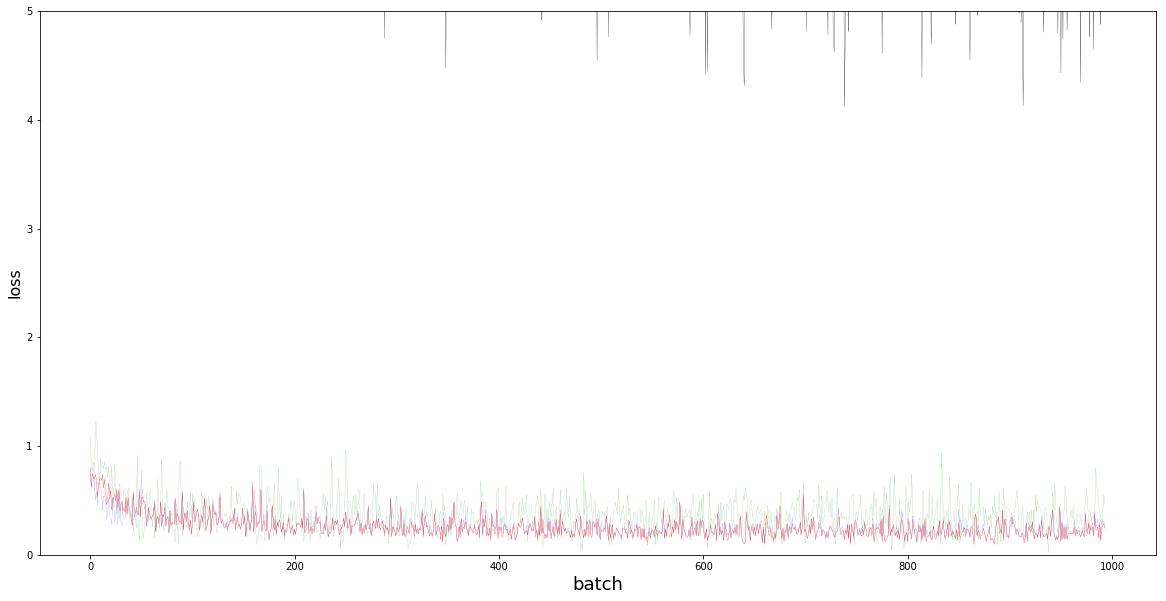

In [12]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()